In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [58]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
#Show rows which have any missing values
train[train.isnull().any(axis=1)].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N


# Analysis of Loan Given by Gender and Education

In [139]:
# Gender and Education to find number of loans approved
loan_by_gendereducation=(train.groupby(['Gender','Education','Loan_Status'])['Loan_ID'].size()).reset_index()
loan_by_gendereducation=loan_by_gendereducation.rename( columns={'Loan_ID':'Count'})
loan_by_gendereducation

,Gender,Education,Loan_Status,Count
0,Female,Graduate,N,31
1,Female,Graduate,Y,61
2,Female,Not Graduate,N,6
3,Female,Not Graduate,Y,14
4,Male,Graduate,N,105
5,Male,Graduate,Y,271
6,Male,Not Graduate,N,45
7,Male,Not Graduate,Y,68


In [140]:
#train.groupby(['Gender','Education','Loan_Status'])['Loan_ID'].size().groupby(['Gender','Education']).apply(lambda x: (100*x/x.sum())).round(2).reset_index()
temp=loan_by_gendereducation.groupby(['Gender','Education'])['Count'].apply(lambda x: (100*x/x.sum())).reset_index().rename(columns={'Count':'Percentage'})
(temp)
#pd.merge(loan_by_gendereducation,temp,left_index=True)

,index,Percentage
0,0,33.695652
1,1,66.304348
2,2,30.000000
3,3,70.000000
4,4,27.925532
5,5,72.074468
6,6,39.823009
7,7,60.176991


In [141]:
loan_by_gendereducation=pd.merge(loan_by_gendereducation,temp,left_index=True,right_index=True)
loan_by_gendereducation.drop('index',inplace=True,axis=1)

In [142]:
loan_by_gendereducation

,Gender,Education,Loan_Status,Count,Percentage
0,Female,Graduate,N,31,33.695652
1,Female,Graduate,Y,61,66.304348
2,Female,Not Graduate,N,6,30.000000
3,Female,Not Graduate,Y,14,70.000000
4,Male,Graduate,N,105,27.925532
5,Male,Graduate,Y,271,72.074468
6,Male,Not Graduate,N,45,39.823009
7,Male,Not Graduate,Y,68,60.176991


# Correlation Heatmap between available numeric features

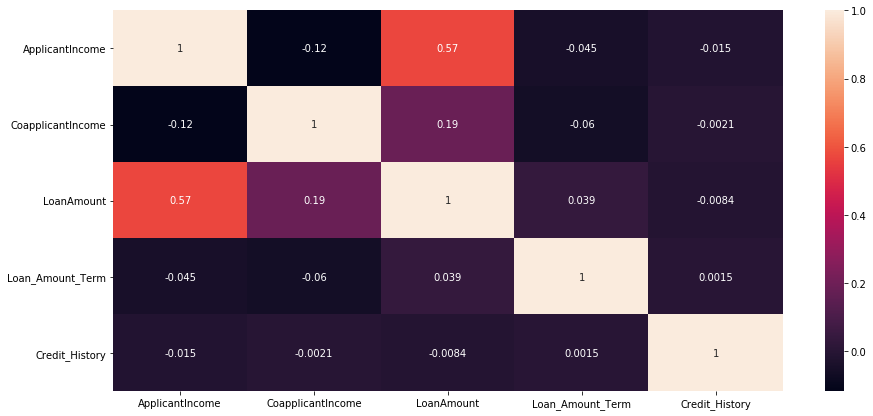

In [165]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014C85FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015B75CF8>]], dtype=object)

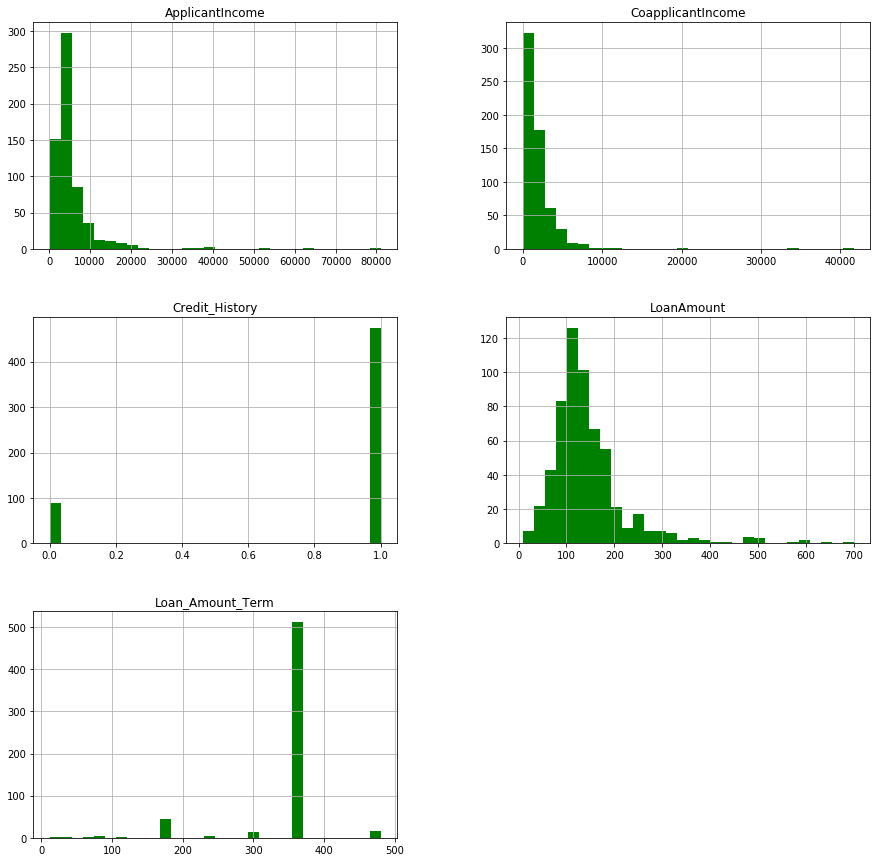

In [168]:
train.hist(color='green', bins=30,figsize=(15,15))

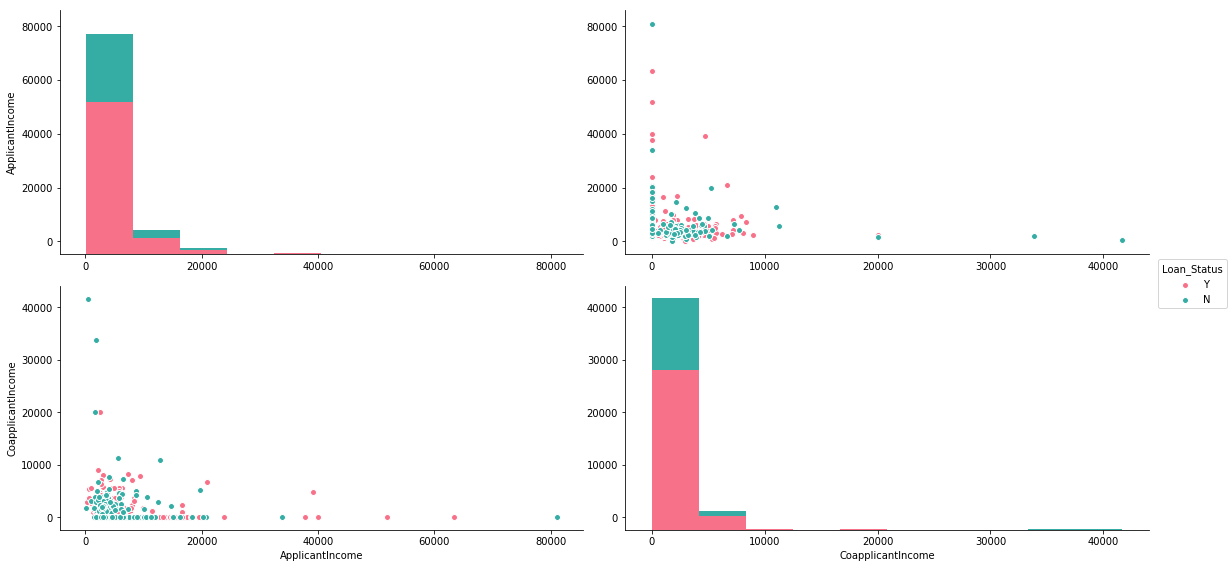

In [234]:
#Scatterplot of Income vs Applied Loan colored by Approved Loan 
train.columns
#train['ApplicantIncome','LoanAmount'].pairplot()
sns.pairplot(train[['ApplicantIncome','CoapplicantIncome','Loan_Status']],hue='Loan_Status', palette="husl",aspect=2,size =4)

# Approved vs Rejected Loan Counts

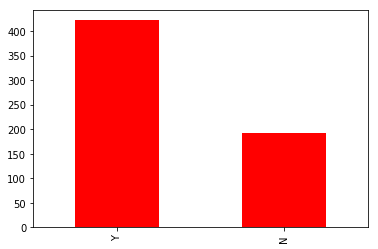

In [217]:

train['Loan_Status'].value_counts().plot(kind='bar',color='red')

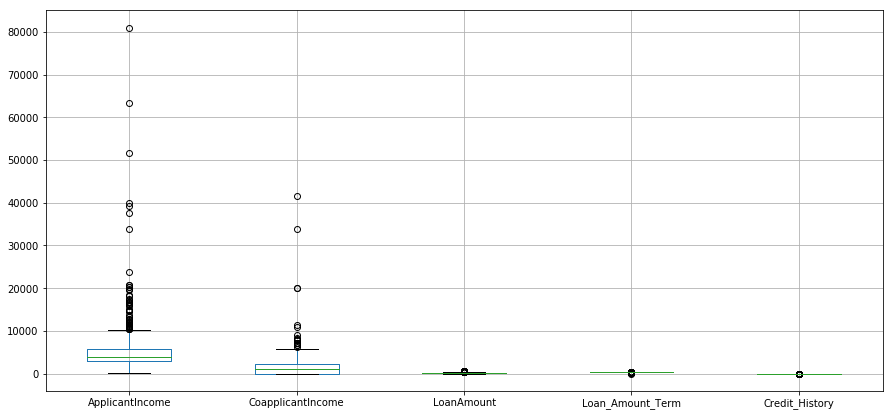

In [224]:
train.boxplot(figsize=(15,7))#,by='Loan_Status')

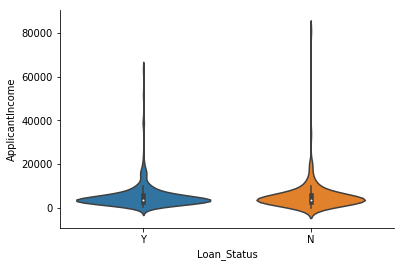

In [236]:
sns.violinplot( train['Loan_Status'],train['ApplicantIncome']) #Variable Plot
sns.despine()


# Loan Approval by Property Type

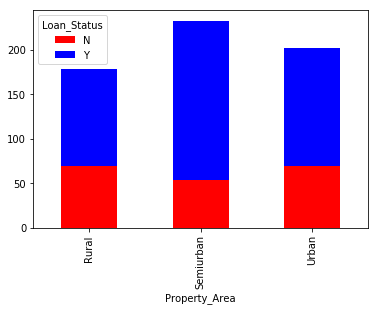

In [249]:
#Propoerty Area wise loan approval
var=train.groupby(['Property_Area','Loan_Status'])['Loan_ID'].count()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)

# Handling Missing Values

In [353]:
#Handling Missing Values
train.isnull().sum()
#train['Gender'].value_counts()

#Fill Missing Gender with the most common Gender
#train['Gender'].fillna(train['Gender'].dropna().mode().values[0],inplace=True)

#Fill Missing Married Status with the most common Status
#train['Married'].fillna(train['Married'].mode().values[0],inplace=True)

#Fill Missing Dependent Status with the most common Status
#train['Dependents'].fillna(train['Dependents'].mode().values[0],inplace=True)

#Fill Loan Term with the Median Value
#train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].value_counts().index[0],inplace=True)

#Fill Loan Amount with the most frequent amount or mean amount..check
#train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

#Fill Missing Credit History with the most common Value
#train['Credit_History'].fillna(train['Credit_History'].mode().values[0],inplace=True)

#Fill Missing Self Employed History with the most common Value
#train['Self_Employed'].fillna(train['Self_Employed'].mode().values[0],inplace=True)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [354]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [359]:
df=train.copy()
df.drop('Loan_ID',inplace=True,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [372]:
from sklearn.preprocessing import LabelEncoder
categorical_variables=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area']

In [375]:
for var in categorical_variables:
    lb=LabelEncoder()
    data=df[var].astype('str')
    lb.fit(data)
    df[var]=lb.transform(df[var].astype('str'))
    

In [385]:
df.loc[df['Dependents']=='3+','Dependents']=3

In [394]:
#df['Dependents'].astype('int',inplace=True)
df['Dependents']=df['Dependents'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int32
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null int64
Property_Area        614 non-null int64
Loan_Status          614 non-null object
dtypes: float64(3), int32(1), int64(7), object(1)
memory usage: 55.2+ KB


In [399]:
X_train=df.drop('Loan_Status',axis=1)
y_train=df['Loan_Status']

In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(n_estimators=20,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [409]:
accuracy_score(y_train,rfc.predict(X_train))

0.99511400651465798